# Import the Usual  Libraries
You can use this as a starting point so you don't forget the imports

In [1]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

# Import the library for thermocouple data

https://pypi.org/project/thermocouples_reference/ is probably not in your library collection already. Add it by typing "pip install thermocouples_reference" in a terminal window (check 1.1.1 Adding libraries.ipynb for details). Until you do that the next code will produce a ModuleNotFound error. The next two cells show how to convert from millivolts to degrees Celcius and back again for the reference junction at 0 C.

In [2]:
from thermocouples_reference import thermocouples

In [3]:
myTypeK = thermocouples['K']
myTypeK.emf_mVC(42, Tref=0)

1.6938477049901346

In [4]:
myTypeK.inverse_CmV(1.69, Tref=0)

41.9062760437112

The Essential Resources / Components / Type K Thermocouple* page from onQ includes:

Manufacturer's Reference Page: https://www.omega.ca/prodinfo/thermocouples.html

Type K Thermocouple Table: https://www.omega.ca/temperature/Z/pdf/z204-206.pdf

Polynomial Fits to Tables: https://www.omega.com/temperature/Z/pdf/z198-201.pdf

Python Library for Thermocouples: https://pypi.org/project/thermocouples_reference/

Thermocouples provide small output voltages that need amplification and cold junction correction. This page provides examples on using thermocouple tables to make manual calculations. Polynomial fits allow you to do the same calculations automatically in code or a spreadsheet.

In [5]:
myTypeK

<Type K thermocouple reference (-270.0 to 1372.0 °C)>

[-50, 700, -5, 30]

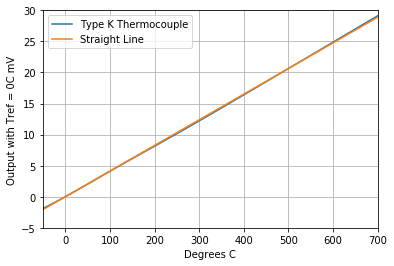

In [13]:
T = linspace(-270,1372,1000)
mV = myTypeK.emf_mVC(T,Tref=0)
mV2 = myTypeK.emf_mVC(500,Tref=0)/500*T
plot(T,mV,label="Type K Thermocouple")
plot(T,mV2,label="Straight Line")
xlabel("Degrees C")
ylabel("Output with Tref = 0C mV")
grid()
legend()
axis([-50,700,-5,30])

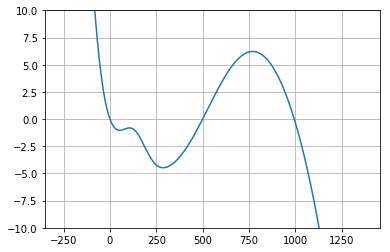

In [20]:
plot(T,(mV-mV2)/.04)
ylim(-10,10)
grid()

## Linear Fit?

The relationship between temperature and voltage is not linear over the full range, although it's close at moderate temperatures, so we might be tempted to use a simple linear model in our Arduino code. How accurate would it be to use a straight line? Will you use that for your measurements with the coffee cup?

In [31]:
mV0 = 0
mV100 = myTypeK.emf_mVC(100,Tref=0)
T = 50
mV = mV0 + mV100 * T / 100
mV

2.048115109361627

## Adjusting for Cold Junction

If the reference or cold junction is at higher than 0C, then the resulting voltage will be lower by the thermocouple value from the table for the reference junction temperature.

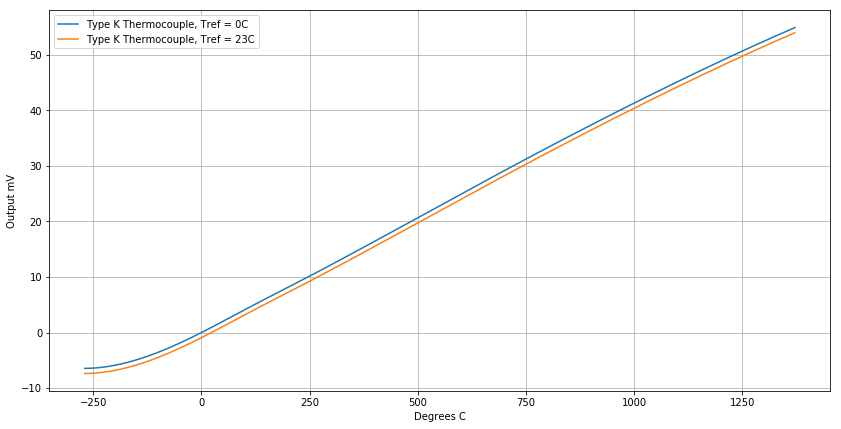

In [34]:
T = linspace(-270,1372,1000)
mV = myTypeK.emf_mVC(T,Tref=0)
mV23 = myTypeK.emf_mVC(T,Tref=23)
plot(T,mV,label="Type K Thermocouple, Tref = 0C")
plot(T,mV23,label="Type K Thermocouple, Tref = 23C")
xlabel("Degrees C")
ylabel("Output mV")
grid()
legend()